# People Engangment Report of Nexus Domain

In [1]:
import json
import numpy as np
import pandas as pd 
import time
import datetime
import math

import matplotlib.pyplot as plt

from pandas import DataFrame
from sqlalchemy import create_engine, distinct
from sqlalchemy.orm import sessionmaker

In [2]:
WEIGHTS_PE = {'w1': 0.6, 'w2': 0.3, 'w3': 0.1}
WEIGHTS_CORP = {'wc': 0.5, 'wl': 0.3, 'wv': 0.2}
DOMAINS = ['sap.io', 'gdpr', 'healthcare', 'chatbot', 'business+one', 'bydesign', 'blockchain',
           'intelligent+enterprise', 'crm', 'innovation']

FILEPATH = '../server/cache/'

sap.io
              pe        pe1        pe2        pe3
count  45.000000  45.000000  45.000000  45.000000
mean    0.116983   0.127121   0.099713   0.107964
std     0.131335   0.183860   0.147269   0.252413
min     0.000000   0.000000   0.000000   0.000000
25%     0.038487   0.038212   0.029908   0.000000
50%     0.066760   0.057446   0.050817   0.000000
75%     0.154670   0.136986   0.087734   0.040909
max     0.657041   1.000000   0.644621   1.000000


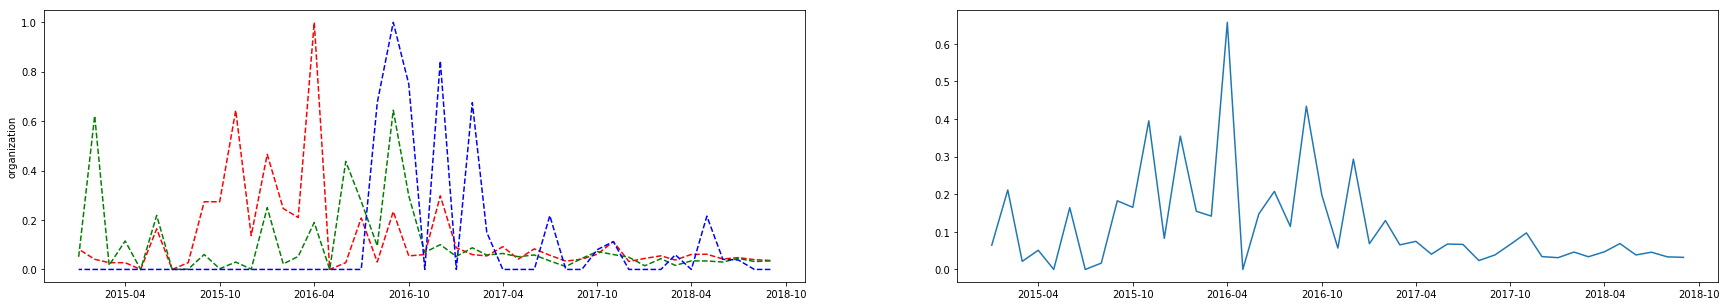

gdpr
              pe        pe1        pe2        pe3
count  52.000000  52.000000  52.000000  52.000000
mean    0.157826   0.152433   0.161232   0.179968
std     0.111356   0.143062   0.124929   0.265745
min     0.000000   0.000000   0.000000   0.000000
25%     0.094675   0.100000   0.081953   0.000000
50%     0.167916   0.146050   0.158343   0.000000
75%     0.219088   0.181102   0.229884   0.380102
max     0.688897   1.000000   0.579198   1.000000


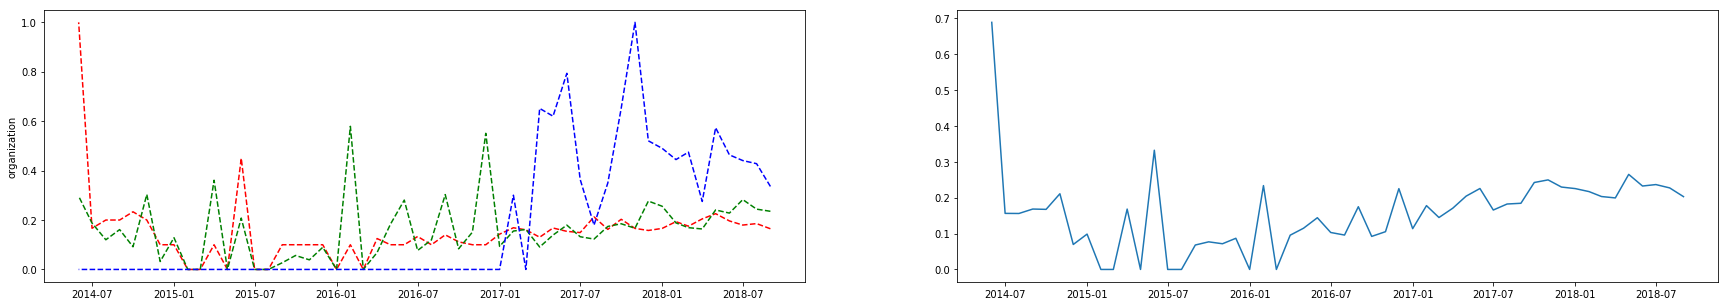

healthcare
              pe        pe1        pe2        pe3
count  99.000000  99.000000  99.000000  99.000000
mean    0.318629   0.396912   0.192149   0.228373
std     0.145898   0.188161   0.125716   0.247033
min     0.000000   0.000000   0.000000   0.000000
25%     0.270763   0.320724   0.135263   0.000000
50%     0.358975   0.424403   0.198540   0.193548
75%     0.410790   0.486503   0.241460   0.391571
max     0.616397   1.000000   0.564534   1.000000


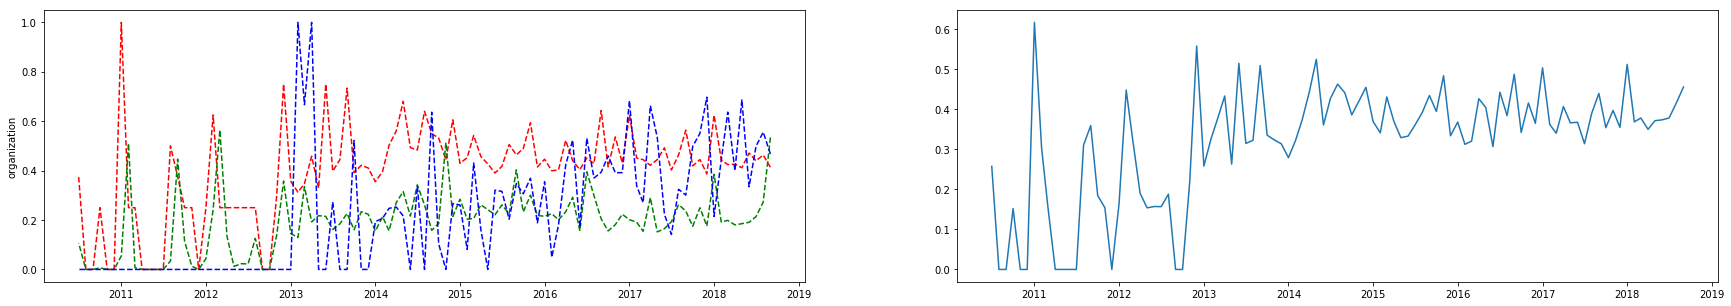

chatbot
              pe        pe1        pe2        pe3
count  63.000000  63.000000  63.000000  63.000000
mean    0.327523   0.487246   0.078192   0.117180
std     0.235040   0.340750   0.136138   0.228193
min     0.000000   0.000000   0.000000   0.000000
25%     0.000000   0.000000   0.000000   0.000000
50%     0.353590   0.555556   0.029941   0.000000
75%     0.530073   0.753719   0.102329   0.035904
max     0.636923   1.000000   0.904999   1.000000


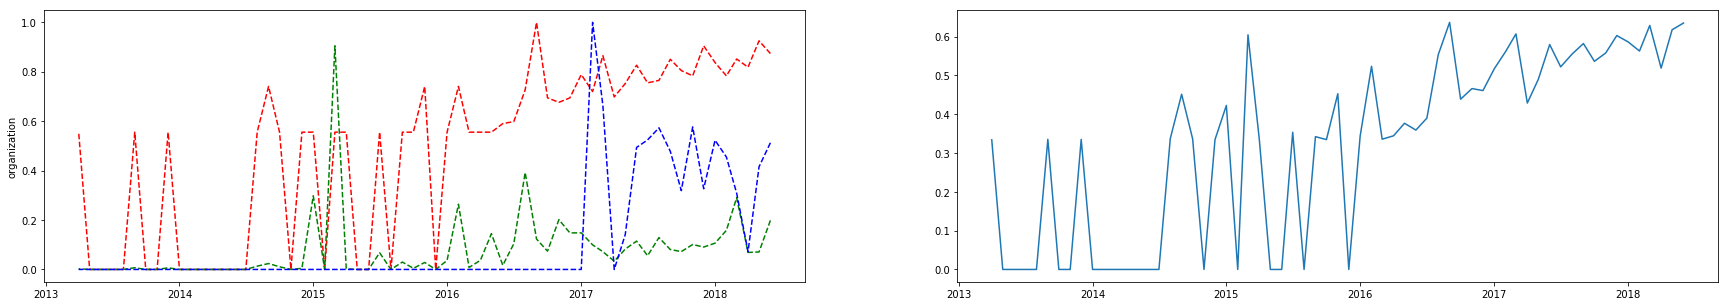

business+one
              pe        pe1        pe2        pe3
count  79.000000  79.000000  79.000000  79.000000
mean    0.218617   0.189044   0.270035   0.241799
std     0.114690   0.113766   0.157944   0.298550
min     0.000000   0.000000   0.000000   0.000000
25%     0.182652   0.171753   0.187348   0.000000
50%     0.229419   0.189474   0.269247   0.000000
75%     0.269233   0.215010   0.365333   0.436972
max     0.826466   1.000000   0.703565   1.000000


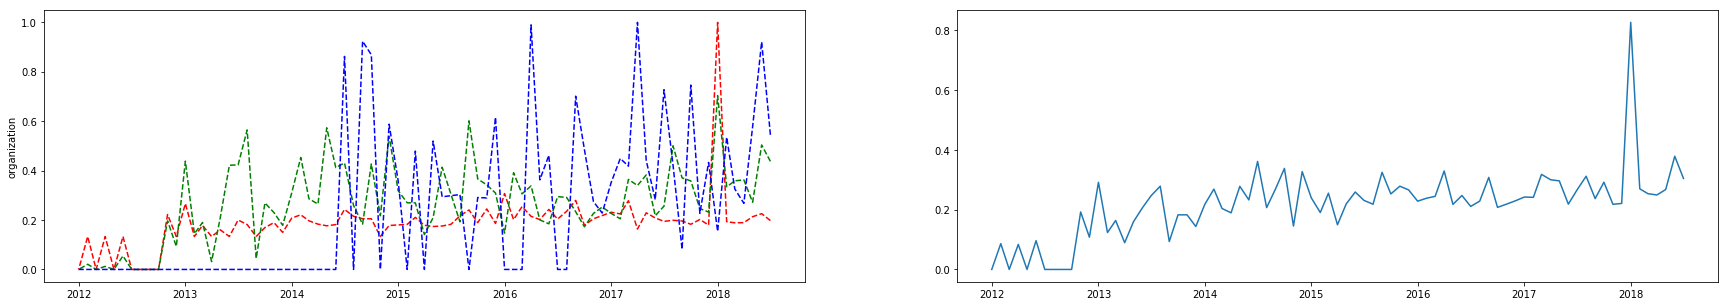

bydesign
              pe        pe1        pe2        pe3
count  80.000000  80.000000  80.000000  80.000000
mean    0.333912   0.452611   0.122780   0.255113
std     0.108594   0.158958   0.089167   0.289951
min     0.000000   0.000000   0.000000   0.000000
25%     0.280429   0.377930   0.076435   0.000000
50%     0.328950   0.435768   0.106653   0.157265
75%     0.381319   0.495527   0.142653   0.531557
max     0.634083   1.000000   0.545000   1.000000


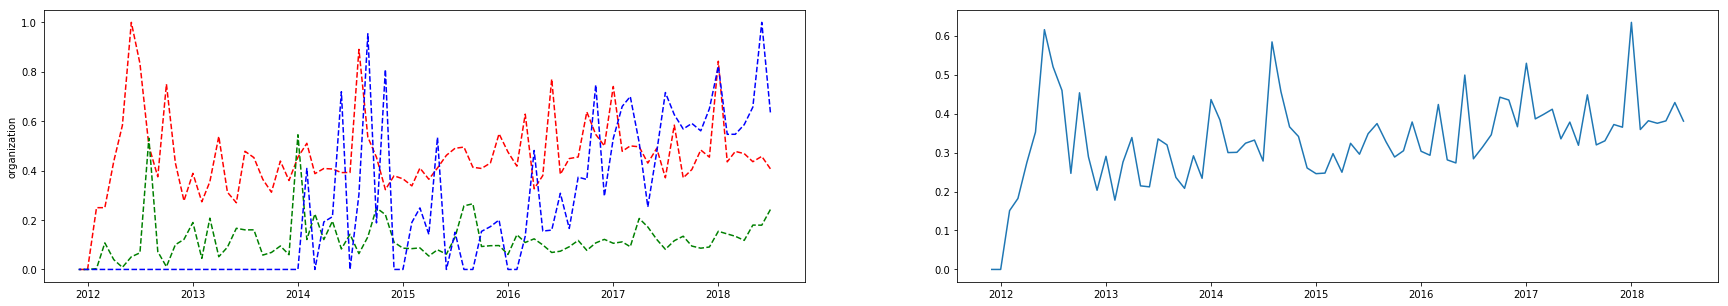

blockchain
              pe        pe1        pe2        pe3
count  52.000000  52.000000  52.000000  52.000000
mean    0.426033   0.558090   0.226627   0.231912
std     0.224145   0.299539   0.150174   0.318270
min     0.000000   0.000000   0.000000   0.000000
25%     0.324562   0.392857   0.170941   0.000000
50%     0.498548   0.665129   0.213625   0.000000
75%     0.591410   0.777707   0.315129   0.490822
max     0.777072   1.000000   0.590241   1.000000


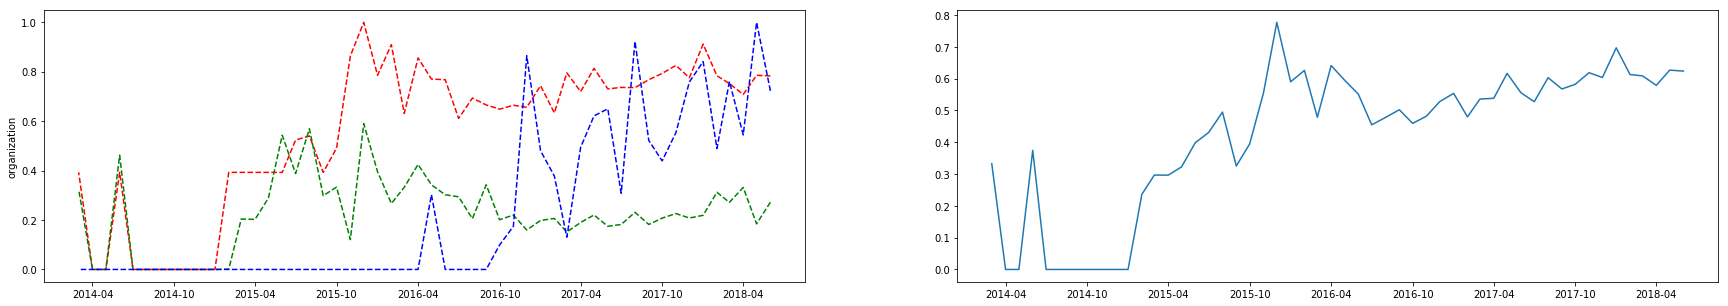

intelligent+enterprise
              pe        pe1        pe2        pe3
count  34.000000  34.000000  34.000000  34.000000
mean    0.417371   0.465137   0.377705   0.249770
std     0.215072   0.265575   0.194702   0.302413
min     0.028449   0.000000   0.094831   0.000000
25%     0.313338   0.329426   0.280275   0.000000
50%     0.390105   0.449897   0.365568   0.158769
75%     0.531609   0.582523   0.516810   0.403697
max     0.892010   1.000000   0.929032   1.000000


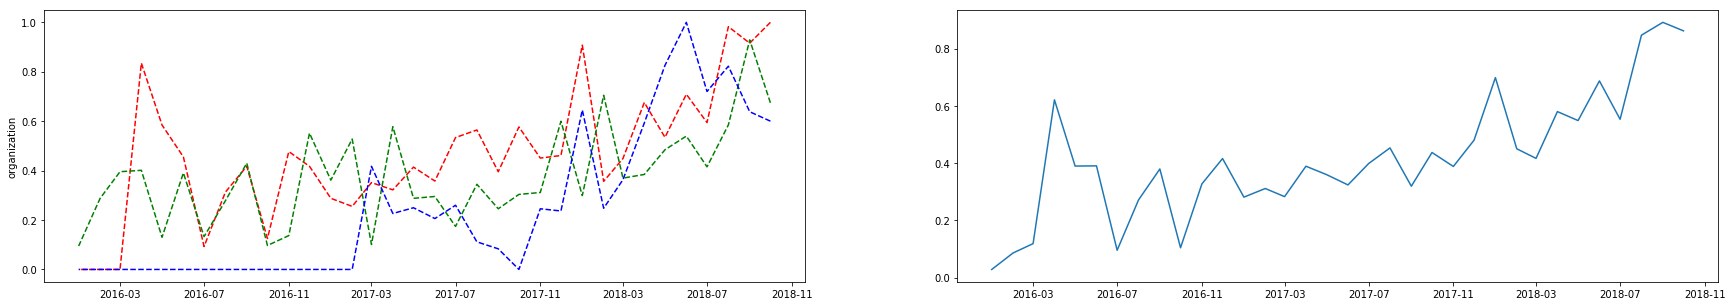

crm
              pe        pe1        pe2        pe3
count  41.000000  41.000000  41.000000  41.000000
mean    0.292740   0.270209   0.263237   0.516429
std     0.140762   0.217489   0.172203   0.233250
min     0.093147   0.000000   0.030500   0.000000
25%     0.201334   0.130298   0.146830   0.375174
50%     0.253416   0.215485   0.211614   0.479706
75%     0.364060   0.347277   0.323828   0.688145
max     0.814306   1.000000   0.888027   1.000000


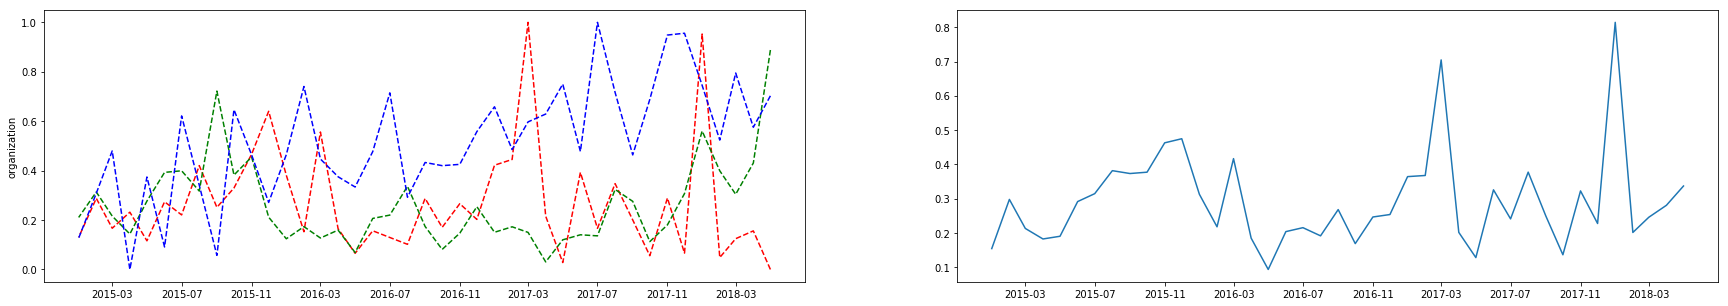

innovation
              pe        pe1        pe2        pe3
count  45.000000  45.000000  45.000000  45.000000
mean    0.141276   0.070768   0.120148   0.627706
std     0.137042   0.157122   0.181018   0.219949
min     0.050137   0.000000   0.009864   0.000000
25%     0.087116   0.022889   0.048252   0.462083
50%     0.110106   0.039994   0.068197   0.628859
75%     0.143551   0.056968   0.108863   0.809042
max     0.900000   1.000000   1.000000   1.000000


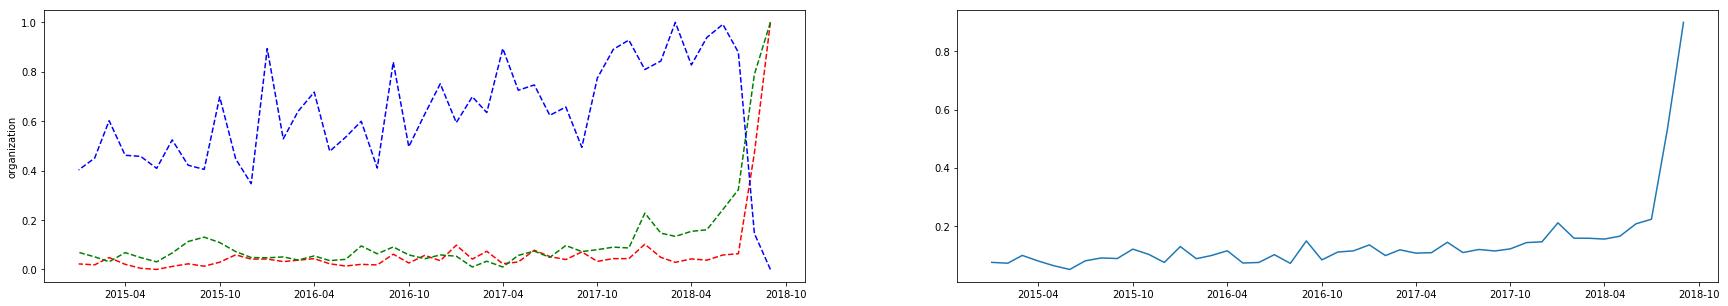

In [3]:
global_domain = []
for domain in DOMAINS:
    df = pd.read_csv(FILEPATH+f'dataset-{domain}-pe-monthly-report.csv', parse_dates={'date':['timeline']})
    df = df.set_index(['date'])
    
    print(domain)
    print(df[['pe','pe1','pe2','pe3']].describe())
    
    fig, axs = plt.subplots(1, 2, figsize=(30, 5), sharex=True, sharey=True)
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)

    ax1.plot(df['pe1'], 'r--')
    ax1.set_ylabel('contribution')
    ax1.plot(df['pe2'], 'g--')
    ax1.set_ylabel('corporation')
    ax1.plot(df['pe3'], 'b--')
    ax1.set_ylabel('organization')
    ax2.plot(df['pe'])

    plt.show()
    
    domain_score = {}
    for i, row in df.iterrows():
        domain_score[i] = row['pe']
        
    global_domain.append(domain_score)

In [4]:
df_global = pd.DataFrame(global_domain)
df_global.to_csv('./global_ps_score.csv')

In [5]:
#2017-01
#0.343372332	0.322890457	0.367584739	0.310125803	0.306501396	0.331122154	0.302955867	0.351780583	0.317254222	0.316390749	0.346429043	0.330076457	0.522637125	0.328669427	0.340467252	0.335866913	0.377593043	0.398335466	0.378308536	0.392741919

global_score = [0.346429043,0.330076457,0.522637125,0.328669427,0.340467252,0.335866913,0.377593043,0.398335466,0.378308536,0.392741919]

intelligent+enterprise
              pe        pe1        pe2        pe3
count  12.000000  12.000000  12.000000  12.000000
mean    0.617115   0.669793   0.524742   0.578163
std     0.178249   0.231175   0.186240   0.254190
min     0.388409   0.356590   0.299010   0.236622
25%     0.472704   0.458496   0.380757   0.334314
50%     0.566693   0.635130   0.512094   0.619137
75%     0.735969   0.909771   0.618354   0.745759
max     0.892010   1.000000   0.929032   1.000000


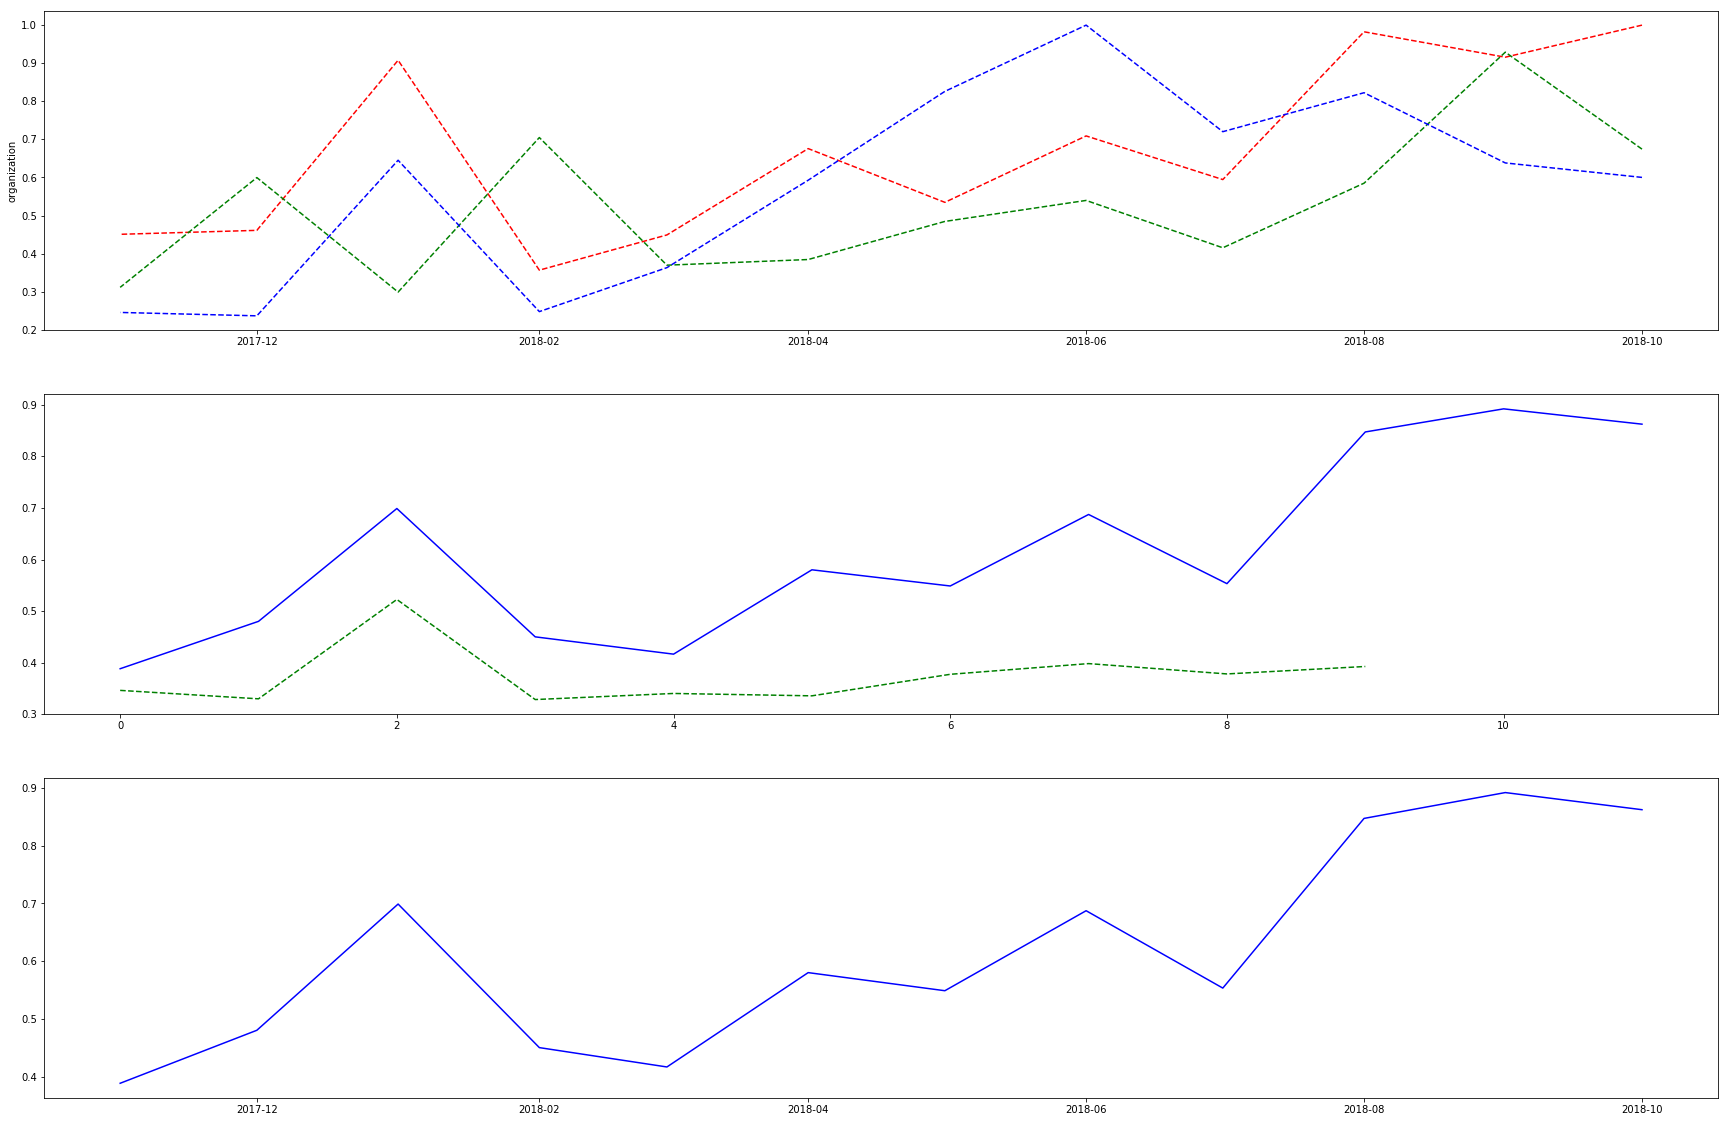

In [6]:
domain = 'intelligent+enterprise'
df = pd.read_csv(FILEPATH+f'dataset-{domain}-pe-monthly-report.csv', parse_dates={'date':['timeline']})
df = df.set_index(['date'])

df = df[df.index>'2017-10']
    
print(domain)
print(df[['pe','pe1','pe2','pe3']].describe())
    
fig, axs = plt.subplots(3, 1, figsize=(30,20), sharex=True, sharey=True)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

ax1.plot(df['pe1'], 'r--')
ax1.set_ylabel('contribution')
ax1.plot(df['pe2'], 'g--')
ax1.set_ylabel('corporation')
ax1.plot(df['pe3'], 'b--')
ax1.set_ylabel('organization')
df = df.sort_index()
ax2.plot(list(df['pe']), 'b')
ax2.plot(global_score, 'g--')
ax3.plot(df['pe'], 'b')

plt.show()

In [7]:
df['pe']

date
2017-11-01    0.388409
2017-12-01    0.480215
2018-01-01    0.698878
2018-02-01    0.450173
2018-03-01    0.416649
2018-04-01    0.580091
2018-05-01    0.548740
2018-06-01    0.687337
2018-07-01    0.553295
2018-08-01    0.847240
2018-09-01    0.892010
2018-10-01    0.862339
Name: pe, dtype: float64

In [8]:
global_score

[0.346429043,
 0.330076457,
 0.522637125,
 0.328669427,
 0.340467252,
 0.335866913,
 0.377593043,
 0.398335466,
 0.378308536,
 0.392741919]